## Default of Bank Loan Clients - Predictive Models

### Problem statement

In general, whenever an individual/corporation applies for a loan from a bank (or any loan issuer), their credit history undergoes a rigorous check to ensure that whether they are capable enough to pay off the loan (in this industry it is referred to as credit-worthiness). 

The issuers have a set of model/s and rule/s in place which take information regarding their current financial standing, previous credit history and some other variables as input and output a metric which gives a measure of the risk that the issuer will potentially take on issuing the loan. The measure is generally in the form of a probability and is the risk that the person will default on their loan (called the probability of default) in the future.

### Solution Approach

- Read data,
- include relevant columns
- Transform data (data cleansing)
- Missing value imputation
- Categorize/Dummify
- Move target variable to different dataframe
- Split - train and cross validation sets
- Predict

### Load packages

In [1]:
# Importing require libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
from xgboost import XGBClassifier
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
pd.options.display.max_rows = 4000

### Read the data

In [4]:
# importing data from local directory 
df = pd.read_csv('XYZCorp_LendingData.txt', sep='\t')

### Check the data

In [5]:
# Checking Number of rows and columns
df.shape

(855969, 73)

### Glimpse the data

##### Univariate analysis

In [6]:
#and checking data wheather the data correctly loaded or not with head function
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [7]:
# Checking mean, standard deviation and qurtiles of all the variables
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


There are 855969 distinct bank loan clients

The average value for the amount of loan_amount limit is 14745. The standard deviation is 8425

As the value 0 for default payment means 'not default' and value 1 means 'default',the mean of 0.054286 means that there are 5.4% of bank loan contracts that will default next month (will verify this in the next sections of this analysis).

#### divding numerical and categorical column names 

In [8]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Numerical features: ", len(numerical_feats))

categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Categorical features: ", len(categorical_feats))

Numerical features:  52
Categorical features:  21


### Check missing data

In [9]:
# finding percentage of null values in the dataset
df.isnull().mean().round(4) * 100

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
term                            0.00
int_rate                        0.00
installment                     0.00
grade                           0.00
sub_grade                       0.00
emp_title                       5.78
emp_length                      5.03
home_ownership                  0.00
annual_inc                      0.00
verification_status             0.00
issue_d                         0.00
pymnt_plan                      0.00
desc                           85.77
purpose                         0.00
title                           0.00
zip_code                        0.00
addr_state                      0.00
dti                             0.00
delinq_2yrs                     0.00
earliest_cr_line                0.00
inq_last_6mths                  0.00
mths_since_last_delinq         51.38
m

There is missing data in the dataset

we have to do imputation process for NA values

### Checking data class balance

In [10]:
# Let's check data unbalance with respect with target value "default_ind"
df['default_ind'].value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

<Figure size 432x432 with 0 Axes>

Text(0.5, 1.0, 'Default bank loan Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')

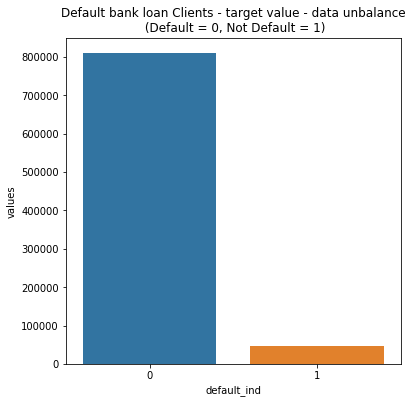

In [11]:
temp = df["default_ind"].value_counts()

balance_df = pd.DataFrame({'default_ind': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('Default bank loan Clients - target value - data unbalance\n (Default = 0, Not Default = 1)')
sns.set_color_codes("pastel")
sns.barplot(x = 'default_ind', y="values", data=balance_df)
locs, labels = plt.xticks()
plt.show()

A number of 46467 out of 855969 (or 5.4%) of clients will default. The data has a large unbalance with respect of the target value (default_ind).

## Data exploration

In [12]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


### infernce:
we can drop id, member_id columns because each observation is unique 

### Checking each variable 

In [13]:
def inspect_data(data):
    return pd.DataFrame({"Data Type":data.dtypes,"No of Levels":data.apply(lambda x: x.unique().shape[0],axis=0), "Levels":data.apply(lambda x: str(x.unique()),axis=0)})

In [14]:
inspect_data(df)

,Data Type,No of Levels,Levels
id,int64,855969,[1077501 1077430 1077175 ... 36271333 36490806...
member_id,int64,855969,[1296599 1314167 1313524 ... 38982739 39222577...
loan_amnt,float64,1368,[5000.0 2500.0 2400.0 ... 32825.0 32575.0 3417...
funded_amnt,float64,1368,[5000.0 2500.0 2400.0 ... 32825.0 32575.0 3417...
funded_amnt_inv,float64,8818,[4975.0 2500.0 2400.0 ... 33625.0 34125.0 3052...
term,object,2,[' 36 months' ' 60 months']
int_rate,float64,520,[10.65 15.27 15.96 13.49 12.69 7.9 18.64 21.28...
installment,float64,67349,[162.87 59.83 84.33 ... 685.27 185.06 237.86]
grade,object,7,['B' 'C' 'A' 'E' 'F' 'D' 'G']
sub_grade,object,35,['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' ...


### here, we are analysing each variable one by one based on above information

issue_d, we can drop. it is datetime variable

id, it is unique to all so it is not providing any information

member_id, like ID column we can drop this variable also

emp_title, it has 235313 unique values and also datatype is object(string). 

we cann't do dummification for this variable so we can drop

issue_d.1, we can drop this variable because it is datetime datatype

title, we can drop this because it has 60991 levels and also it is object so we cann't create 60991 levles

zip_code, it has 901 levels so we can drop

addr_state, it has 50 levels. it is our wish. here i will drop this variable

as per domain perspective adress cann't impact on this problem

earliest_cr_line, it is datetime datatype

last_pymnt_d, it is datetime datatype

last_credit_pull_d, it is datetime and has 108 levels

policy_code, it has only 1 level that meand it is common to all customers so it is not providing any information

application_type, it also has 1 level

##### Note: so, we can drop above all columns

term, it is categorical variable. it has 2 levels

grade, it is categorical variable. it has 7 levels

subgrade, it has 35 levels

emp_length, it is object variable. here we can consider continuous variable or ordinal variable

if we apply strip function on this variable, it will become numerical variable or 
second case taking object then do dummification

home_ownership, this is categorical variable. it has 8 levels we should do dummification for this variable

verification_status, it has 3 levels

pymnt_plan, it has 2 levels

Purpose, it has 14 levles

inq_last_6mths, it has 9 levels. we should anlayse this variable

initial_list_status, it has 2 levels

next_pymnt_d, it is datetime datatype but it has only 4 levels so we can do dummification for this variable

##### Note: above data is providing information about categories in object variables

## Bivariante analysis

### Feature correlation

In [16]:
numerical_feats

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'annual_inc_joint', 'dti_joint', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m',
       'default_ind'],
      dtype='object')

<Figure size 864x864 with 0 Axes>

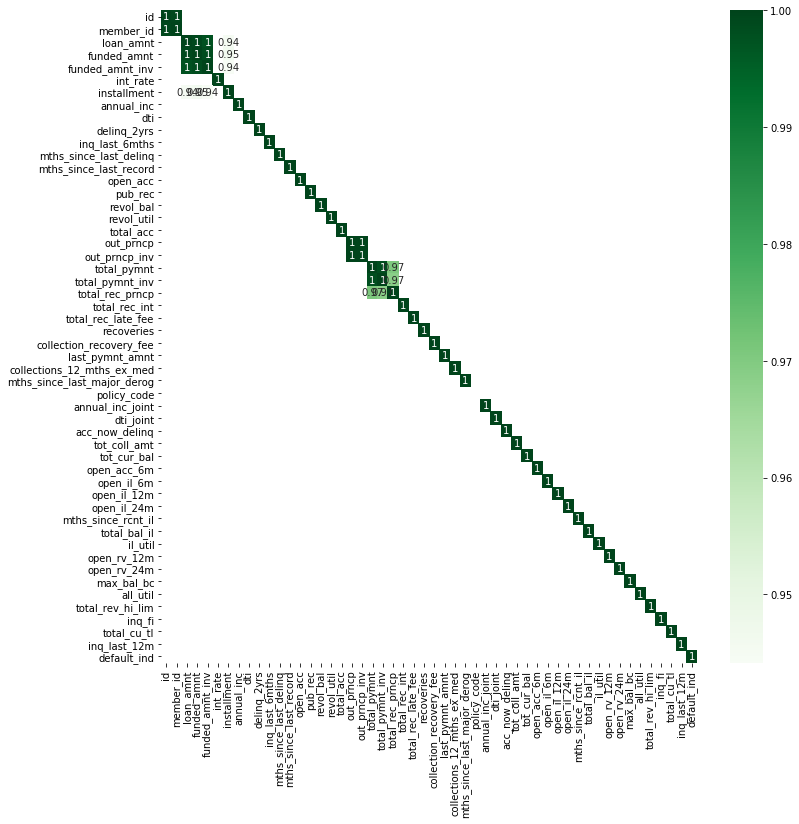

In [17]:
plt.figure(figsize=(12,12))
corr = df[numerical_feats].corr()
kot = corr[corr >= 0.85]
sns.heatmap(kot, annot= True, cmap='Greens')

### Inference:

High correlation between these variables
funded_amnt_inv vs funded_amnt = 1

installement vs funded_amnt = 0.95

installement vs funded_amnt_inv = 0.95

loan_amnt vs funded_amnt = 1

loan_amnt vs funded_amnt_inv = 1

loan_amnt vs installement = 0.95

recoveries vs collection_recovery_fee = 0.92

total_pymnt_inv vs total_pymnt = 1

total_rec_prncp vs total_pymnt = 0.96

total_rec_prncp vs total_pymnt_inv = 0.96


###### we can drop these variables based on multicollinearity
['funded_amnt_inv', 'installment', 'loan_amnt', 'recoveries', 'total_pymnt_inv', 'total_rec_prncp']

## Categorical vs categorical (X and Y)

### Chi-square test

In [18]:
categorical_feats

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

In [19]:
# creating function for chisquare test
def chi_square(df_name, columns, target):
    import pandas as pd
    from scipy.stats import chi2_contingency
    for col in columns:
        table = pd.crosstab(df_name[col], target, margins=False)
        chi2_stat, p_val, dof, ex = chi2_contingency(table)
        if p_val <= 0.05:
            print(f"There is a relationship between {col} and {target.name} variable")
        else:
            print(f"There is no relationship between {col} and {target.name} variables")

In [20]:
# Calling chi_square function  for categorical 
df_name = df
columns = categorical_feats
target = df['default_ind']
chi_square(df_name, columns, target)

There is a relationship between term and default_ind variable
There is a relationship between grade and default_ind variable
There is a relationship between sub_grade and default_ind variable
There is a relationship between emp_title and default_ind variable
There is a relationship between emp_length and default_ind variable
There is a relationship between home_ownership and default_ind variable
There is a relationship between verification_status and default_ind variable
There is a relationship between issue_d and default_ind variable
There is no relationship between pymnt_plan and default_ind variables
There is no relationship between desc and default_ind variables
There is a relationship between purpose and default_ind variable
There is a relationship between title and default_ind variable
There is a relationship between zip_code and default_ind variable
There is a relationship between addr_state and default_ind variable
There is a relationship between earliest_cr_line and default_in

##### Inference:

based on chi-square test, there is no relation between pymnt_plan and target variable 

-> no relationship between desc and default_ind

-> no relationship between verification_status_joint and default_ind

so we can drop this variables

# Preprocessing

### Splitting data into train and test

In [21]:
# checking issue_d column format
df['issue_d'].head()

# it is in string format. we should convert string format to datetime format

0    Dec-2011
1    Dec-2011
2    Dec-2011
3    Dec-2011
4    Dec-2011
Name: issue_d, dtype: object

In [22]:
# converting string into datetime format
df['issue_d'] = pd.to_datetime(df['issue_d'])
df['issue_d'].head()

0   2011-12-01
1   2011-12-01
2   2011-12-01
3   2011-12-01
4   2011-12-01
Name: issue_d, dtype: datetime64[ns]

In [23]:
# setting index with issue_d column then sortng the data by index
df = df.set_index(df['issue_d'])
df = df.sort_index()

In [24]:
# Checking index column in dataset
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
issue_d,,,,,,,,,,,,,,,,,,,,,
2007-06-01,87023,86999,7500.0,7500.0,800.0,36 months,13.75,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-07-01,90966,90962,5000.0,5000.0,4150.0,36 months,7.43,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-07-01,99009,98991,5750.0,5750.0,3675.0,36 months,7.43,178.69,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-07-01,112245,112227,5000.0,5000.0,3975.0,36 months,7.43,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2007-07-01,109355,109346,1200.0,1200.0,0.0,36 months,11.54,39.60,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [25]:
# create train and test partition
train = df['2007-06-01':'2015-05-01']
test = df['2015-06-01':'2015-12-01']
print(train.shape)
print(test.shape)

(598978, 73)
(256991, 73)


### dropping NA value columns

In [26]:
# finding percentage of null values in the dataset
train.isna().mean().round(4) * 100

id                               0.00
member_id                        0.00
loan_amnt                        0.00
funded_amnt                      0.00
funded_amnt_inv                  0.00
term                             0.00
int_rate                         0.00
installment                      0.00
grade                            0.00
sub_grade                        0.00
emp_title                        5.75
emp_length                       4.69
home_ownership                   0.00
annual_inc                       0.00
verification_status              0.00
issue_d                          0.00
pymnt_plan                       0.00
desc                            79.67
purpose                          0.00
title                            0.00
zip_code                         0.00
addr_state                       0.00
dti                              0.00
delinq_2yrs                      0.00
earliest_cr_line                 0.00
inq_last_6mths                   0.00
mths_since_l

In [27]:
## Drop columns with NA greater than 50%
train = train.loc[:,train.isnull().mean(axis=0) < 0.5]
print(train.shape)

## Droping NA columns with greater than 50% NA values in test
test = test.loc[:,test.isnull().mean(axis=0) < 0.5]
print(test.shape)

(598978, 52)
(256991, 53)


In [28]:
# "mths_since_last_delinq" , it was dropped in train data because it has more than 50% NA values
# Let's check in test data
test['mths_since_last_delinq'].isna().mean()

0.4857913312139336

In [29]:
# mths_since_last_delinq has 48% NA values so we can drop this column in test data also
test.drop('mths_since_last_delinq', axis=1, inplace=True)
print(test.shape)

(256991, 52)


In [30]:
# Now, train and test have equal columns
print(train.shape)
print(test.shape)

(598978, 52)
(256991, 52)


In [31]:
train.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'default_ind'],
      dtype='object')

### dropping unimportant variables

In [32]:
# Based on inspect data function
# we can drop id and member_id variables because both variables have unique values to all customers. 
# it is not providing any information
dropping_col = ['issue_d','id','member_id']

train.drop(dropping_col, axis = 1, inplace=True)
test.drop(dropping_col, axis=1, inplace=True)

In [33]:
print(train.shape)
print(test.shape)

(598978, 49)
(256991, 49)


#### cardinality is the number of unique values for the categorical attribute

some variables have high cardinality such as addr_state, earliest_cr_line, emp_title, issue_d, issue_d.1, last_credit_pull_d, last_pymnt_d, purpose, title, zip_code

along with these variables we can drop application_type because it has only one unique value

now, we are going to drop high cardinality variables

In [34]:
categorical_feats

Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'earliest_cr_line', 'initial_list_status', 'last_pymnt_d',
       'next_pymnt_d', 'last_credit_pull_d', 'application_type',
       'verification_status_joint'],
      dtype='object')

In [35]:
cardinality_col = ['addr_state', 'earliest_cr_line', 'emp_title', 
                   'last_credit_pull_d', 
                   'last_pymnt_d', 'purpose', 'title', 'zip_code',
                  'application_type']


train.drop(cardinality_col, axis = 1, inplace=True)
test.drop(cardinality_col, axis=1, inplace=True)

In [36]:
print(train.shape)
print(test.shape)

(598978, 40)
(256991, 40)


In [37]:
# policy_code is common to all observations in numerical features so it is not providing any information we can drop this from numerical features
train.drop(['policy_code'], axis = 1, inplace=True)
test.drop(['policy_code'], axis=1, inplace=True)

print(train.shape)
print(test.shape)

(598978, 39)
(256991, 39)


In [38]:
# based on chi-square test, there is no relation between pymnt_plan and target variable so we can drop this variable
train.drop(['pymnt_plan'], axis = 1, inplace=True)
test.drop(['pymnt_plan'], axis=1, inplace=True)

print(train.shape)
print(test.shape)

(598978, 38)
(256991, 38)


In [39]:
# we can drop these variables based on multicollinearity
mul_col = ['funded_amnt_inv', 'installment', 'loan_amnt', 'recoveries', 'total_pymnt_inv', 'total_rec_prncp']

train.drop(mul_col, axis = 1, inplace=True)
test.drop(mul_col, axis=1, inplace=True)

print(train.shape)
print(test.shape)

(598978, 32)
(256991, 32)


### Imputation

In [40]:
# finding percentage of null values in the dataset
train.isnull().mean().round(4) * 100

funded_amnt                    0.00
term                           0.00
int_rate                       0.00
grade                          0.00
sub_grade                      0.00
emp_length                     4.69
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
dti                            0.00
delinq_2yrs                    0.00
inq_last_6mths                 0.00
open_acc                       0.00
pub_rec                        0.00
revol_bal                      0.00
revol_util                     0.06
total_acc                      0.00
initial_list_status            0.00
out_prncp                      0.00
out_prncp_inv                  0.00
total_pymnt                    0.00
total_rec_int                  0.00
total_rec_late_fee             0.00
collection_recovery_fee        0.00
last_pymnt_amnt                0.00
next_pymnt_d                  40.85
collections_12_mths_ex_med     0.01
acc_now_delinq              

In [41]:
train.loc[:,train.isnull().mean(axis=0) > 0].dtypes

emp_length                     object
revol_util                    float64
next_pymnt_d                   object
collections_12_mths_ex_med    float64
tot_coll_amt                  float64
tot_cur_bal                   float64
total_rev_hi_lim              float64
dtype: object

In [42]:
# first Imputing categorical variables in train dataset
train['emp_length'].fillna(train['emp_length'].mode()[0], inplace = True)
train['next_pymnt_d'].fillna(train['next_pymnt_d'].mode()[0], inplace = True)

print("training data")
print(train[['emp_length','next_pymnt_d']].isna().mean())

# Imputing categorical variables in test dataset
test['emp_length'].fillna(test['emp_length'].mode()[0], inplace = True)
test['next_pymnt_d'].fillna(test['next_pymnt_d'].mode()[0], inplace = True)

print("\n")
print("test data")
print(test[['emp_length','next_pymnt_d']].isna().mean())

training data
emp_length      0.0
next_pymnt_d    0.0
dtype: float64


test data
emp_length      0.0
next_pymnt_d    0.0
dtype: float64


In [43]:
num_NA_col = ['revol_util','collections_12_mths_ex_med','tot_coll_amt','tot_cur_bal',
              'total_rev_hi_lim']

from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')
train.loc[:, num_NA_col] = imp.fit_transform(train[num_NA_col])

print("training data")
print(train[num_NA_col].isna().mean())


from sklearn.impute import SimpleImputer
imp = SimpleImputer(strategy = 'median')
test.loc[:, num_NA_col] = imp.fit_transform(test[num_NA_col])

print("\n")
print("test data")
test[num_NA_col].isna().mean()

training data
revol_util                    0.0
collections_12_mths_ex_med    0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_lim              0.0
dtype: float64


test data


revol_util                    0.0
collections_12_mths_ex_med    0.0
tot_coll_amt                  0.0
tot_cur_bal                   0.0
total_rev_hi_lim              0.0
dtype: float64

In [44]:
print(train.shape)
print(test.shape)

(598978, 32)
(256991, 32)


In [45]:
train.columns

Index(['funded_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'dti',
       'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_rec_int', 'total_rec_late_fee',
       'collection_recovery_fee', 'last_pymnt_amnt', 'next_pymnt_d',
       'collections_12_mths_ex_med', 'acc_now_delinq', 'tot_coll_amt',
       'tot_cur_bal', 'total_rev_hi_lim', 'default_ind'],
      dtype='object')

### Sepearating independent and dependent variables

In [46]:
# Seperating x and y variables
X_train = train[train.columns.difference(['default_ind'])]
y_train = train['default_ind']

X_test = test[test.columns.difference(['default_ind'])]
y_test = test['default_ind']

In [47]:
# checking dimensions of X and y dataframes
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(598978, 31)
(598978,)
(256991, 31)
(256991,)


### Dummification

In [48]:
X_train = pd.get_dummies(X_train, drop_first = True)
X_test = pd.get_dummies(X_test, drop_first = True)

print(X_train.shape)
print(X_test.shape)

(598978, 84)
(256991, 82)


In [49]:
# alignment for X_train and X_test dataset
X_train, X_test = X_train.align(X_test, join = 'inner', axis = 1)

print(X_train.shape)
print(X_test.shape)

(598978, 82)
(256991, 82)


## Model Building

### Logistic regression - Basic model

In [50]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log = LogisticRegression(random_state = 123)
model_log.fit(X_train, y_train)

y_p_train_log = model_log.predict(X_train)
y_p_test_log = model_log.predict(X_test)

print("accuracy_score")
print(accuracy_score(y_train, y_p_train_log))
print(accuracy_score(y_test, y_p_test_log))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_log))
print(confusion_matrix(y_test, y_p_test_log))

print("classification_report")
print(classification_report(y_train, y_p_train_log))
print(classification_report(y_test, y_p_test_log))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.9964239087245275
0.9995447311384446
confusion_matrix
[[552762     60]
 [  2082  44074]]
[[256627     53]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.95      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.82      0.79      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.90    256991
weighted avg       1.00      1.00      1.00    256991



### Note: in this problem, we need to consider recall because target variable is imbalance

##### Inference: we got very good recall and precision 

### Cross validation

In [57]:
# #  Checking logistic model results with 5- fold cross validation
# from sklearn.model_selection import cross_val_score  
# print (cross_val_score(model_log, X_train, y_train, cv=5).mean())

0.9961768191506485


### Hyper parameter tunning for logistic regression

In [53]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

log = LogisticRegression()
par = {'penalty':['l1', 'l2'], 'C':uniform(loc = 0, scale = 4)}

clf = RandomizedSearchCV(log, par, random_state=123, n_iter=100, cv=5,n_jobs=-1)
best_model = clf.fit(X_train, y_train)


print(best_model.best_params_)
print(best_model.best_score_)

{'C': 1.5774802158110992, 'penalty': 'l2'}
0.9962435993157704


#### Logistic regression with best parameters

In [54]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

y_p_train_best = best_model.predict(X_train)
y_p_test_best = best_model.predict(X_test)

print("accuracy_score")
print(accuracy_score(y_train, y_p_train_best))
print(accuracy_score(y_test, y_p_test_best))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_best))
print(confusion_matrix(y_test, y_p_test_best))

print("classification_report")
print(classification_report(y_train, y_p_train_best))
print(classification_report(y_test, y_p_test_best))

accuracy_score
0.9965875207436667
0.9996653579308225
confusion_matrix
[[552808     14]
 [  2030  44126]]
[[256658     22]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.92      0.79      0.85       311

    accuracy                           1.00    256991
   macro avg       0.96      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991



#### Note: the model performance improved after hyperparameter tuning

### now, tuning C parameter 

In [55]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

C_range =  [0.001,0.01,0.1,1,10,100,1000]

for i in C_range:
    model_log = LogisticRegression(penalty='l2', C=i,
                                   random_state=123)
    model_log.fit(X_train, y_train)

    y_p_train_log = model_log.predict(X_train)
    y_p_test_log = model_log.predict(X_test)
    print(f"classification_report {i}")
    print(classification_report(y_test, y_p_test_log))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.95      0.79      0.87       311

    accuracy                           1.00    256991
   macro avg       0.98      0.90      0.93    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.84      0.79      0.82       311

    accuracy                           1.00    256991
   macro avg       0.92      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.87      0.79      0.83       311

    accuracy                           1.00    256991
   macro avg       0.93      0.90      0.91    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.82      0.79      0.81       311

    accuracy                           1.00    256991
   macro avg       0.91      0.90      0.90    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.87      0.79      0.83       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991



### Logistic Regression with best c = 100 value

In [96]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log_1 = LogisticRegression(penalty= 'l2', C = 100, random_state = 123)
model_log_1.fit(X_train, y_train)

y_p_train_log_1 = model_log_1.predict(X_train)
y_p_test_log_1 = model_log_1.predict(X_test)

print("accuracy_score")
print(accuracy_score(y_train, y_p_train_log_1))
print(accuracy_score(y_test, y_p_test_log_1))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_log_1))
print(confusion_matrix(y_test, y_p_test_log_1))

print("classification_report")
print(classification_report(y_train, y_p_train_log_1))
print(classification_report(y_test, y_p_test_log_1))

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.9963304161421621
0.9997509640415423
confusion_matrix
[[552811     11]
 [  2187  43969]]
[[256680      0]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.95      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       1.00      0.79      0.89       311

    accuracy                           1.00    256991
   macro avg       1.00      0.90      0.94    256991
weighted avg       1.00      1.00      1.00    256991



### Decision tree - basic model

In [56]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Building decision tree model without any parameters
model_dt = DecisionTreeClassifier(random_state= 123)
model_dt.fit(X_train, y_train)


# finding prediction values
y_p_train_dt = model_dt.predict(X_train)
y_p_test_dt = model_dt.predict(X_test)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_dt))
print(accuracy_score(y_test, y_p_test_dt))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_dt))
print(confusion_matrix(y_test, y_p_test_dt))

print("classification_report")
print(classification_report(y_train, y_p_train_dt))
print(classification_report(y_test, y_p_test_dt))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

accuracy_score
1.0
0.40971862827881134
confusion_matrix
[[552822      0]
 [     0  46156]]
[[104988 151692]
 [     5    306]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.41      0.58    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.41    256991
   macro avg       0.50      0.70      0.29    256991
weighted avg       1.00      0.41      0.58    256991



got very less accuracy on test data through decision tree due to overfitting problem 

Decision tree was overfitted on train dataset. it performed worst on test data

### Random forest - basic model

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Building decision tree model without any parameters
model_rf = RandomForestClassifier(random_state= 123)
model_rf.fit(X_train, y_train)


# finding prediction values
y_p_train_rf = model_rf.predict(X_train)
y_p_test_rf = model_rf.predict(X_test)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_rf))
print(accuracy_score(y_test, y_p_test_rf))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_rf))
print(confusion_matrix(y_test, y_p_test_rf))

print("classification_report")
print(classification_report(y_train, y_p_train_rf))
print(classification_report(y_test, y_p_test_rf))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

accuracy_score
0.9999949914688019
0.748115692767451
confusion_matrix
[[552822      0]
 [     3  46153]]
[[191962  64718]
 [    14    297]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.75      0.86    256680
           1       0.00      0.95      0.01       311

    accuracy                           0.75    256991
   macro avg       0.50      0.85      0.43    256991
weighted avg       1.00      0.75      0.85    256991



Random forest performed some better than decision tree. it gave good accuracy than decision tree

### Checking  Feature importance based on Random forest

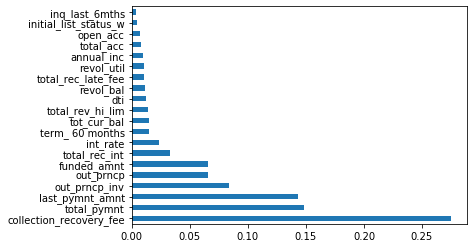

In [58]:
feat_imp = pd.Series(model_rf.feature_importances_,index=X_train.columns)
feat_imp.nlargest(20).plot(kind='barh')

In [60]:
# creating list for important columns based on random forest feature importance
important_col = ['collection_recovery_fee','total_pymnt','last_pymnt_amnt','out_prncp_inv','out_prncp',
'funded_amnt','total_rec_int','int_rate','term_ 60 months','tot_cur_bal','total_rev_hi_lim','dti',
'revol_bal','total_rec_late_fee','revol_util','annual_inc','total_acc','open_acc','initial_list_status',
'inq_last_6mths']

# creating unimportant columns in a list
unimportant_col = []
for i in X_train.columns:
    if i not in important_col:
        unimportant_col.append(i)
print(unimportant_col)        

['acc_now_delinq', 'collections_12_mths_ex_med', 'delinq_2yrs', 'pub_rec', 'tot_coll_amt', 'emp_length_10+ years', 'emp_length_2 years', 'emp_length_3 years', 'emp_length_4 years', 'emp_length_5 years', 'emp_length_6 years', 'emp_length_7 years', 'emp_length_8 years', 'emp_length_9 years', 'emp_length_< 1 year', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE', 'home_ownership_OWN', 'home_ownership_RENT', 'initial_list_status_w', 'next_pymnt_d_Jan-2016', 'next_pymnt_d_Mar-2016', 'sub_grade_A2', 'sub_grade_A3', 'sub_grade_A4', 'sub_grade_A5', 'sub_grade_B1', 'sub_grade_B2', 'sub_grade_B3', 'sub_grade_B4', 'sub_grade_B5', 'sub_grade_C1', 'sub_grade_C2', 'sub_grade_C3', 'sub_grade_C4', 'sub_grade_C5', 'sub_grade_D1', 'sub_grade_D2', 'sub_grade_D3', 'sub_grade_D4', 'sub_grade_D5', 'sub_grade_E1', 'sub_grade_E2', 'sub_grade_E3', 'sub_grade_E4', 'sub_grade_E5', 'sub_grade_F1', 'sub_grade_F2', 'sub_grade_F3', 'sub_grade_F4', 'sub_grade_F5', 'sub_grad

In [61]:
# creating new dataframe and dropping unimportant columns
X_train_rf = X_train.drop(unimportant_col, axis = 1)
X_test_rf = X_test.drop(unimportant_col, axis=1)

print(X_train_rf.shape)
print(X_test_rf.shape)

(598978, 19)
(256991, 19)


In [66]:
# changing column name for Xgboost
X_train_rf.rename(index={'term_ 60 months':'term_ 60_months'}, inplace=True)
X_test_rf.rename(index={'term_ 60 months':'term_ 60_months'}, inplace=True)

### XGBoost with important columns

In [67]:
import xgboost
from sklearn.metrics import auc

xg = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

xg.fit(X_train_rf, y_train, early_stopping_rounds=20, 
        eval_metric="auc", eval_set=[(X_test_rf, y_test)], verbose=True)

# finding prediction values
y_p_train_xg = xg.predict(X_train_rf)
y_p_test_xg = xg.predict(X_test_rf)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_xg))
print(accuracy_score(y_test, y_p_test_xg))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_xg))
print(confusion_matrix(y_test, y_p_test_xg))

print("classification_report")
print(classification_report(y_train, y_p_train_xg))
print(classification_report(y_test, y_p_test_xg))

[0]	validation_0-auc:0.94131
Will train until validation_0-auc hasn't improved in 20 rounds.
[1]	validation_0-auc:0.94132
[2]	validation_0-auc:0.94165
[3]	validation_0-auc:0.94169
[4]	validation_0-auc:0.94428
[5]	validation_0-auc:0.94418
[6]	validation_0-auc:0.94440
[7]	validation_0-auc:0.94856
[8]	validation_0-auc:0.94908
[9]	validation_0-auc:0.94909
[10]	validation_0-auc:0.94999
[11]	validation_0-auc:0.95003
[12]	validation_0-auc:0.94971
[13]	validation_0-auc:0.94967
[14]	validation_0-auc:0.94976
[15]	validation_0-auc:0.94955
[16]	validation_0-auc:0.94712
[17]	validation_0-auc:0.94544
[18]	validation_0-auc:0.94712
[19]	validation_0-auc:0.94714
[20]	validation_0-auc:0.94706
[21]	validation_0-auc:0.94690
[22]	validation_0-auc:0.94612
[23]	validation_0-auc:0.94119
[24]	validation_0-auc:0.92644
[25]	validation_0-auc:0.92628
[26]	validation_0-auc:0.92578
[27]	validation_0-auc:0.92511
[28]	validation_0-auc:0.92428
[29]	validation_0-auc:0.92224
[30]	validation_0-auc:0.92186
[31]	validation_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=10, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=20,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=500, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=9616, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=9616, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

accuracy_score
0.9971417981962609
0.8885836468981404
confusion_matrix
[[552799     23]
 [  1689  44467]]
[[228087  28593]
 [    40    271]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.89      0.94    256680
           1       0.01      0.87      0.02       311

    accuracy                           0.89    256991
   macro avg       0.50      0.88      0.48    256991
weighted avg       1.00      0.89      0.94    256991



### Hyperparameter tuning

In [70]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

param_test1 = {"learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] }


xgbclf = XGBClassifier(n_estimators=500,subsample=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27) 
 

rsearch1 = RandomizedSearchCV(estimator=xgbclf, 
                              param_distributions = param_test1, 
                              scoring='roc_auc',
                              n_jobs=-1,
                              iid=False)


rsearch1.fit(X_train_rf, y_train)
rsearch1.best_params_, rsearch1.best_score_

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=Non...
                                           validate_parameters=None,
                                           verbosity=None),
                   iid=False, n_iter=10, n_jobs=-1,
                   param_distributions={'co

({'min_child_weight': 7,
  'max_depth': 3,
  'learning_rate': 0.1,
  'gamma': 0.3,
  'colsample_bytree': 0.4},
 0.990347402618067)

### XGBoost with best parameters

In [71]:
# finding prediction values
y_p_train_xg_h = rsearch1.predict(X_train_rf)
y_p_test_xg_h = rsearch1.predict(X_test_rf)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_xg_h))
print(accuracy_score(y_test, y_p_test_xg_h))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_xg_h))
print(confusion_matrix(y_test, y_p_test_xg_h))

print("classification_report")
print(classification_report(y_train, y_p_train_xg_h))
print(classification_report(y_test, y_p_test_xg_h))

accuracy_score
0.9968179131787812
0.4892622698849376
confusion_matrix
[[552809     13]
 [  1893  44263]]
[[125431 131249]
 [     6    305]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.49      0.66    256680
           1       0.00      0.98      0.00       311

    accuracy                           0.49    256991
   macro avg       0.50      0.73      0.33    256991
weighted avg       1.00      0.49      0.66    256991



### Model building - 2

we got some important variables through random forest so we are going to Build model with important columns

#### Logistic Regression with X_train_rf dataset(19 variables)

In [97]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log_2 = LogisticRegression(random_state = 123)
model_log_2.fit(X_train_rf, y_train)

y_p_train_log_2 = model_log_2.predict(X_train_rf)
y_p_test_log_2 = model_log_2.predict(X_test_rf)

print("accuracy_score")
print(accuracy_score(y_train, y_p_train_log_2))
print(accuracy_score(y_test, y_p_test_log_2))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_log_2))
print(confusion_matrix(y_test, y_p_test_log_2))

print("classification_report")
print(classification_report(y_train, y_p_train_log_2))
print(classification_report(y_test, y_p_test_log_2))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.996597537806063
0.9996186636886116
confusion_matrix
[[552788     34]
 [  2004  44152]]
[[256646     34]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      0.96      0.98     46156

    accuracy                           1.00    598978
   macro avg       1.00      0.98      0.99    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.88      0.79      0.83       311

    accuracy                           1.00    256991
   macro avg       0.94      0.90      0.92    256991
weighted avg       1.00      1.00      1.00    256991



### Decision tree

In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Building decision tree model without any parameters
model_dt_2 = DecisionTreeClassifier(random_state= 123)
model_dt_2.fit(X_train_rf, y_train)


# finding prediction values
y_p_train_dt = model_dt_2.predict(X_train_rf)
y_p_test_dt = model_dt_2.predict(X_test_rf)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_dt))
print(accuracy_score(y_test, y_p_test_dt))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_dt))
print(confusion_matrix(y_test, y_p_test_dt))

print("classification_report")
print(classification_report(y_train, y_p_train_dt))
print(classification_report(y_test, y_p_test_dt))

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

accuracy_score
1.0
0.4534516772960921
confusion_matrix
[[552822      0]
 [     0  46156]]
[[116233 140447]
 [    11    300]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.45      0.62    256680
           1       0.00      0.96      0.00       311

    accuracy                           0.45    256991
   macro avg       0.50      0.71      0.31    256991
weighted avg       1.00      0.45      0.62    256991



### Random forest

In [76]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# Building decision tree model without any parameters
model_rf_2 = RandomForestClassifier(random_state= 123)
model_rf_2.fit(X_train_rf, y_train)


# finding prediction values
y_p_train_rf = model_rf_2.predict(X_train_rf)
y_p_test_rf = model_rf_2.predict(X_test_rf)

# finding accuracy score
print("accuracy_score")
print(accuracy_score(y_train, y_p_train_rf))
print(accuracy_score(y_test, y_p_test_rf))

print("confusion_matrix")
print(confusion_matrix(y_train, y_p_train_rf))
print(confusion_matrix(y_test, y_p_test_rf))

print("classification_report")
print(classification_report(y_train, y_p_train_rf))
print(classification_report(y_test, y_p_test_rf))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

accuracy_score
0.9999933219584025
0.4711565774676934
confusion_matrix
[[552822      0]
 [     4  46152]]
[[120776 135904]
 [     4    307]]
classification_report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    552822
           1       1.00      1.00      1.00     46156

    accuracy                           1.00    598978
   macro avg       1.00      1.00      1.00    598978
weighted avg       1.00      1.00      1.00    598978

              precision    recall  f1-score   support

           0       1.00      0.47      0.64    256680
           1       0.00      0.99      0.00       311

    accuracy                           0.47    256991
   macro avg       0.50      0.73      0.32    256991
weighted avg       1.00      0.47      0.64    256991



## 3. Undersampling

In [78]:
y_train.value_counts()

0    552822
1     46156
Name: default_ind, dtype: int64

In [79]:
y_test.value_counts()

0    256680
1       311
Name: default_ind, dtype: int64

In [80]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_train_rus, y_train_rus = rus.fit_sample(X_train_rf, y_train)

Using TensorFlow backend.


In [81]:
print(X_train_rus.shape)
print(y_train_rus.shape)

(92312, 19)
(92312,)


### Logistic regression with undersampling data

In [82]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log_3 = LogisticRegression(random_state = 123)
model_log_3.fit(X_train_rus, y_train_rus)

y_p_train_log = model_log_3.predict(X_train_rus)
y_p_test_log = model_log_3.predict(X_test_rf)

print("accuracy_score")
print(accuracy_score(y_train_rus, y_p_train_log))
print(accuracy_score(y_test, y_p_test_log))

print("confusion_matrix")
print(confusion_matrix(y_train_rus, y_p_train_log))
print(confusion_matrix(y_test, y_p_test_log))

print("classification_report")
print(classification_report(y_train_rus, y_p_train_log))
print(classification_report(y_test, y_p_test_log))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.9830032931796516
0.9993073687405396
confusion_matrix
[[46132    24]
 [ 1545 44611]]
[[256566    114]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46156
           1       1.00      0.97      0.98     46156

    accuracy                           0.98     92312
   macro avg       0.98      0.98      0.98     92312
weighted avg       0.98      0.98      0.98     92312

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



### Hyperparameter tuning for Logistic regression (undersampling)

In [83]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

C_range =  [0.001,0.01,0.1,1,10,100,1000]

for i in C_range:
    model_log_3 = LogisticRegression(penalty='l2', C=i,
                                   random_state=123)
    model_log_3.fit(X_train_rus, y_train_rus)

    y_p_train_log = model_log_3.predict(X_train_rus)
    y_p_test_log = model_log_3.predict(X_test_rf)
    print(f"classification_report {i}")
    print(classification_report(y_test, y_p_test_log))

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.001
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.01
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.69      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 0.1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 10
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 100
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

classification_report 1000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



##### Note: There is no improvement with tunning c parameter

In [84]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

log_3 = LogisticRegression()
par = {'penalty':['l1', 'l2'], 'C':uniform(loc = 0, scale = 4)}

clf_3 = RandomizedSearchCV(log_3, par, random_state=123, n_iter=100,n_jobs=-1)
best_model_3 = clf_3.fit(X_train_rus, y_train_rus)


print(best_model_3.best_params_)
print(best_model_3.best_score_)

{'C': 2.0800406122899338, 'penalty': 'l2'}
0.9816707697998392


### Logistic Regression with best parameters

In [98]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

y_p_train_log_3 = best_model_3.predict(X_train_rus)
y_p_test_log_3 = best_model_3.predict(X_test_rf)

print("accuracy_score")
print(accuracy_score(y_train_rus, y_p_train_log_3))
print(accuracy_score(y_test, y_p_test_log_3))

print("confusion_matrix")
print(confusion_matrix(y_train_rus, y_p_train_log_3))
print(confusion_matrix(y_test, y_p_test_log_3))

print("classification_report")
print(classification_report(y_train_rus, y_p_train_log_3))
print(classification_report(y_test, y_p_test_log_3))

accuracy_score
0.9826674755178092
0.9993073687405396
confusion_matrix
[[46132    24]
 [ 1576 44580]]
[[256566    114]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     46156
           1       1.00      0.97      0.98     46156

    accuracy                           0.98     92312
   macro avg       0.98      0.98      0.98     92312
weighted avg       0.98      0.98      0.98     92312

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



### oversampling

In [87]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_train_ros, y_train_ros = ros.fit_sample(X_train_rf, y_train)

In [88]:
print(X_train_ros.shape)
print(y_train_ros.shape)

(1105644, 19)
(1105644,)


### Logistic regression with over sampling data

In [99]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log_4 = LogisticRegression(random_state = 123)
model_log_4.fit(X_train_ros, y_train_ros)

y_p_train_log_4 = model_log_4.predict(X_train_ros)
y_p_test_log_4 = model_log_4.predict(X_test_rf)

print("accuracy_score")
print(accuracy_score(y_train_ros, y_p_train_log_4))
print(accuracy_score(y_test, y_p_test_log_4))

print("confusion_matrix")
print(confusion_matrix(y_train_ros, y_p_train_log_4))
print(confusion_matrix(y_test, y_p_test_log_4))

print("classification_report")
print(classification_report(y_train_ros, y_p_train_log_4))
print(classification_report(y_test, y_p_test_log_4))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.9823460354327432
0.9993073687405396
confusion_matrix
[[552446    376]
 [ 19143 533679]]
[[256566    114]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       0.97      1.00      0.98    552822
           1       1.00      0.97      0.98    552822

    accuracy                           0.98   1105644
   macro avg       0.98      0.98      0.98   1105644
weighted avg       0.98      0.98      0.98   1105644

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.68      0.79      0.74       311

    accuracy                           1.00    256991
   macro avg       0.84      0.90      0.87    256991
weighted avg       1.00      1.00      1.00    256991



### SMOTE 

In [90]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek()
X_train_smt, y_train_smt = smt.fit_sample(X_train_rf, y_train)

In [91]:
print(X_train_smt.shape)
print(y_train_smt.shape)

(1104560, 19)
(1104560,)


### Logistic regression - SMOTE

In [100]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression

model_log_5 = LogisticRegression(random_state = 123)
model_log_5.fit(X_train_smt, y_train_smt)

y_p_train_log_5 = model_log_5.predict(X_train_smt)
y_p_test_log_5 = model_log_5.predict(X_test_rf)

print("accuracy_score")
print(accuracy_score(y_train_smt, y_p_train_log_5))
print(accuracy_score(y_test, y_p_test_log_5))

print("confusion_matrix")
print(confusion_matrix(y_train_smt, y_p_train_log_5))
print(confusion_matrix(y_test, y_p_test_log_5))

print("classification_report")
print(classification_report(y_train_smt, y_p_train_log_5))
print(classification_report(y_test, y_p_test_log_5))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=123, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

accuracy_score
0.9887520822771059
0.9992061978824162
confusion_matrix
[[551945    335]
 [ 12089 540191]]
[[256540    140]
 [    64    247]]
classification_report
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    552280
           1       1.00      0.98      0.99    552280

    accuracy                           0.99   1104560
   macro avg       0.99      0.99      0.99   1104560
weighted avg       0.99      0.99      0.99   1104560

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    256680
           1       0.64      0.79      0.71       311

    accuracy                           1.00    256991
   macro avg       0.82      0.90      0.85    256991
weighted avg       1.00      1.00      1.00    256991



### ROC Curve plot function

In [105]:
from sklearn import metrics
import seaborn as sns
sns.set('talk', 'whitegrid', 'dark', font_scale=1, font='Ricty',rc={"lines.linewidth": 2, 'grid.linestyle': '--'})
def plotAUC(truth, pred, lab):
    fpr, tpr, _ = metrics.roc_curve(truth,pred)
    roc_auc = metrics.auc(fpr, tpr)
    lw = 2
    c = (np.random.rand(), np.random.rand(), np.random.rand())
    plt.plot(fpr, tpr, color= c,lw=lw, label= lab +'(AUC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve') #Receiver Operating Characteristic 
    plt.legend(loc="lower right", prop= {'size':10})

<Figure size 720x720 with 0 Axes>

findfont: Font family ['Ricty'] not found. Falling back to DejaVu Sans.


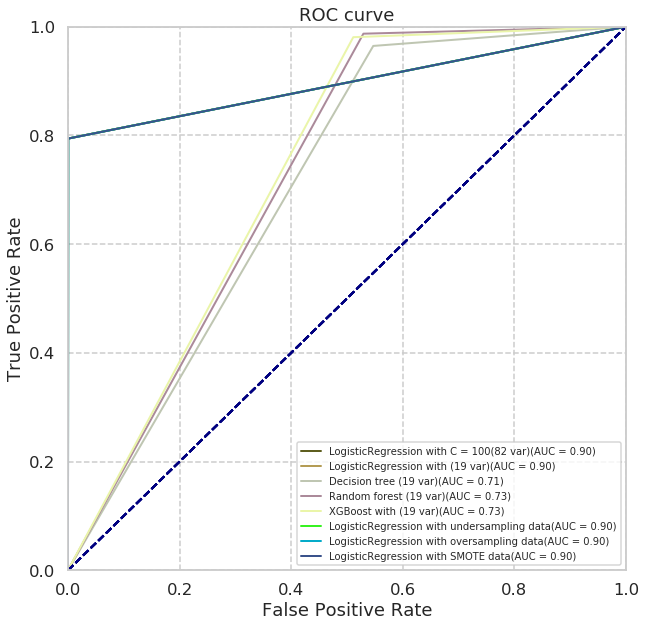

In [106]:
plt.figure(figsize=(10,10))
plotAUC(y_test, y_p_test_log_1, 'LogisticRegression with C = 100(82 var)')
plotAUC(y_test, y_p_test_log_2, 'LogisticRegression with (19 var)')
plotAUC(y_test, y_p_test_dt, 'Decision tree (19 var)')
plotAUC(y_test, y_p_test_rf, 'Random forest (19 var)')
plotAUC(y_test, y_p_test_xg_h, 'XGBoost with (19 var)')
plotAUC(y_test, y_p_test_log_3, 'LogisticRegression with undersampling data')
plotAUC(y_test, y_p_test_log_4, 'LogisticRegression with oversampling data')
plotAUC(y_test, y_p_test_log_5, 'LogisticRegression with SMOTE data')
plt.show()

## Results

### 1. All basic model results

#### Logistic Regression

Logistic regression basic model - precision (0.91), recall(0.90), f1-score (0.90)

after hyper parameter tunning - p- 0.96, r - 0.90,f1- 0.93

tuning c parameter - p - 1.00, r - 0.90, f1 - 0.94

### Decision tree

basic model - (Precision - 50, Recall - 70 , F1-score - 29)

### Random forest

basic model - (precision - 50, Recall - 85, F1-score - 43)

### XGBoost:
basic model:(Precision - 50 , Recall-88, F1-score -48)

hyperparameter tuning:(Precision - 50 , Recall - 73, F1-score - 33

### 2. After dropped unimportant columns

#### Logistic regression 
precision - 94, Recall - 90, F1-score - 92

#### Decision tree
precision - 0.50 , Recall -  0.71 , F1-score - 0.31 

#### Random forest
precision - 0.50 , Recall -  0.73 , F1-score - 0.32 

### 3. undersampling for important columns

LogisticRegression precision - 0.84 , Recall - 0.90 , F1-score - 0.87

### 4. Oversampling

LogisticRegression
precision - 0.84 , Recall -  0.90 , F1-score - 0.87 

### 5. SMOTE

Logisticregression 
precision - 0.82 , Recall -  0.90 , F1-score - 0.85 

### Conclusion:
Intital we built logistic, decision tree, random forest but only logistic regression perform very well. we got precision is 100%, recall is 90%, and F1-score is 94%. Remaining all algortithms overfitted on train data and underfitted on test data. Thereafter we dropped some variables based on random forest feature importance then we tried XGboost, Logistic, decision tree and randomforest but again logistic performed good on important columns dataset but it didn't cross previous results. Afterthat we used sampling techinques such as downsampling, upsampling and SMOTE but these also didn't cross logistic 1st model results

Finally our best model is Logistic Regression with precision - 100%, Recall - 90% and F1-score - 94%